In [ ]:
import pandas as pd

In [ ]:
names = ['sepal_length','sepal_width','petal_length','petal_width','class']

In [ ]:
df = pd.read_csv('/Users/xieqingyao/Desktop/iris.data.txt',header=None,names=names)

In [ ]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


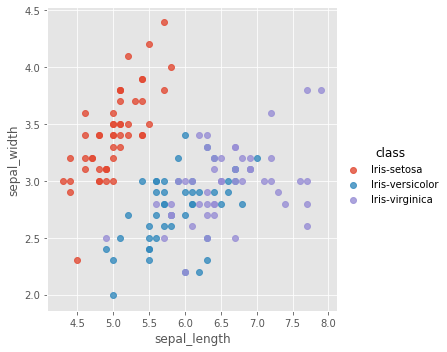

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.lmplot('sepal_length','sepal_width',data = df,fit_reg = False,hue = 'class')

In [ ]:
# df.info()

In [ ]:
# df.describe()

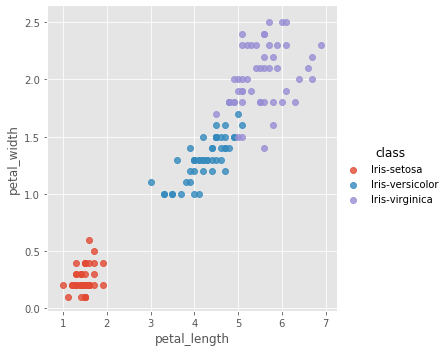

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.lmplot('petal_length','petal_width',data = df,fit_reg = False,hue = 'class')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values  #除去class
y = df.iloc[:,4].values    #取出class

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 1)

In [ ]:
# X[0:3]

In [ ]:
# y[0:3]

In [ ]:
# len(X_test),len(X_train)

In [ ]:
# len(y_test),len(y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)    #k=3
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.98

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')

In [ ]:
scores

array([1. , 1. , 0.9, 1. , 1. , 0.7, 1. , 0.9, 0.9, 0.8])

In [ ]:
neighbors = [x for x in range(1,50) if x%2!=0]
# neighbors 

In [ ]:
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# cv_scores
# len(cv_scores)

In [ ]:
MSE = [1- x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print('the optimal number of neighbors is %d .' % optimal_k) 

the optimal number of neighbors is 5 .


Text(0, 0.5, 'misclassification error')

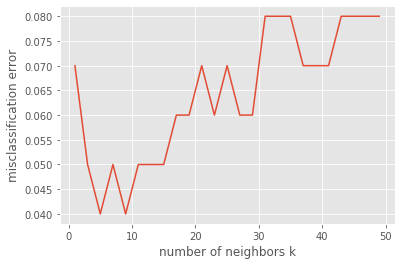

In [ ]:
plt.plot(neighbors,MSE)
plt.xlabel('number of neighbors k')
plt.ylabel('misclassification error')

    KNN:用最相像的Ｋ筆訓練資料來預測。
    
        pros:不需要假設/算法簡單/可用於回歸和分類
        
        cons:需要大容量(會用到全部資料)/k較大時運行時間長/不相關的特徵無法忽略/對離群值敏感